In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# paramètres du problème
mu = 0.05
sigma = 0.3
sigma2 = sigma**2
S0 = 1
h = 0.05
T = 1
M = int(T/h)
N = 1000

In [5]:
def get_M () :
    """ retourne une liste de S(t) ; t allant de 1 à M. """
    Z = np.random.rand(M)
    SM =[
        S0 * np.exp((mu - sigma2/2) * t + sigma * np.sqrt(t) * Z[t])
        for t in range(M)
        ]
    SMF = [S0] + SM
    return SMF

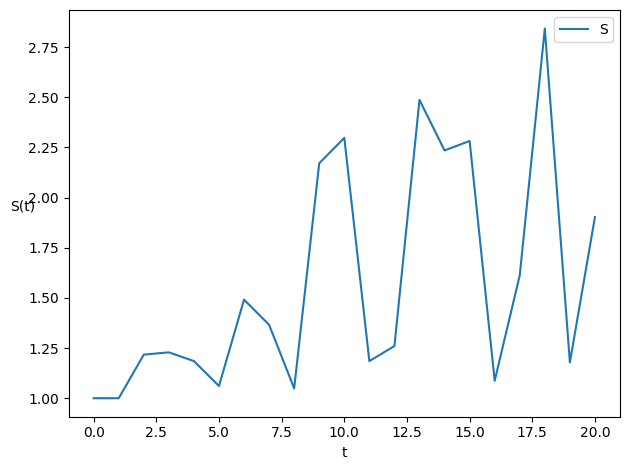

In [6]:
# affichage d'un échantillon d'évolution d'actif boursier.
plt.plot(get_M())
plt.legend("S")
plt.ylabel("S(t)", rotation=0)
plt.xlabel("t")
plt.tight_layout()
plt.savefig("échantillon.png")

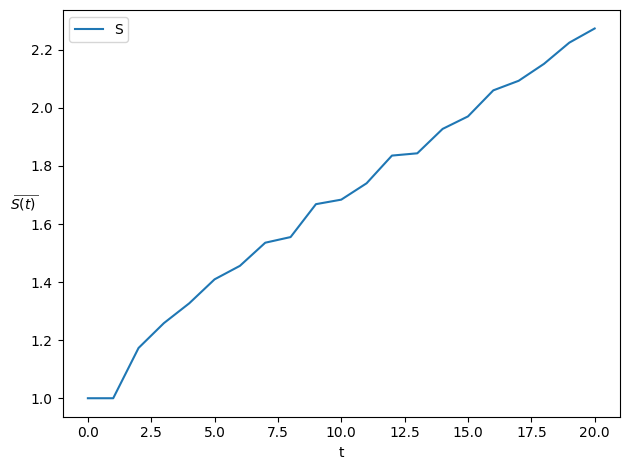

In [7]:
# génération d'une liste de N échantillons S(t) ; t allant de 1 à M
SMN = np.array([get_M() for n in range(N)])
SMN_mean = np.mean(SMN, axis=0)

# affichage de l'évolution moyenne de l'actif boursier pour tout t allant de 1 à M (N éléments)
plt.plot(SMN_mean)
plt.legend("S")
plt.ylabel("$\widebar{S(t)}$", rotation=0)
plt.xlabel("t")
plt.tight_layout()
plt.savefig("moyenne.png")

In [8]:
# affichage du gain moyen de l'actif boursier de 1 à M (N éléments)
print(f"gain moyen: {(SMN[:, -1] - S0).mean():.2f}")

gain moyen: 1.27
